<a href="https://colab.research.google.com/github/MANASWINI0305/ML_Project/blob/main/ML_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM STATEMENT
UNIVERSITY ADMISSION PREDICTION

Develop a predictive model that uses historical data on student academic performance, standardized test scores and other relevant factors to predict the probability of a student to get admission into those preferred colleges and suggest a list of collages in a sequence of the probability of getting admission to that specific college.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df1=pd.read_csv("/content/admission.csv")
df1.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,IIT Bombay
1,2015,95,92,2,100,IIT delhi
2,2018,91,80,6,260,IIT kanpur
3,2017,88,85,2,222,IIT kharagpur
4,2016,89,84,1,600,IIT guwahati


In [ ]:
df=df1.copy()
len(df)

1004

In [ ]:
colg=np.unique(df['College'])
print(colg)
print(len(df))
print(len(colg))

['Ahemedabad IT' 'BIT Mesra' 'BITS pilani' 'BMS college of ENGG'
 'DTU delhi' 'HBUT kanpur' 'IIEST shibpur' 'IIIT hydrabad' 'IIT Bombay'
 'IIT bhilai' 'IIT delhi' 'IIT goa' 'IIT guwahati' 'IIT hydrabad'
 'IIT indore' 'IIT jammu' 'IIT jodhpur' 'IIT kanpur' 'IIT kharagpur'
 'IIT mandi' 'IIT palakkad' 'IIT ropar' 'IIT tirupati'
 'Jadavpur Univversity' 'KLEF hydrabad' 'MNIT jaipur' 'MNNIT allahabad'
 'MSIT' 'Manipal IT' 'NIT trichy' 'NIT warangal' 'NMIMS'
 'Netaji Subhas IT' 'S O A  university' 'SRMIST chennai'
 'SSN college of ENGG' 'University college of ENGG' 'VIT vellore']
1004
38


In [ ]:
code=[]
for i in range(len(colg)):
    code.append(i+1)

In [ ]:
df['College']=df['College'].replace(colg,code)
bak_college=np.array(df['College'])
df.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,9
1,2015,95,92,2,100,11
2,2018,91,80,6,260,18
3,2017,88,85,2,222,19
4,2016,89,84,1,600,13


In [ ]:
X = df.drop(columns=["Year","College"])
y=df['College']

<ipython-input-8-1b5b0e2825da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['10th Marks'])


<Axes: xlabel='10th Marks', ylabel='Density'>

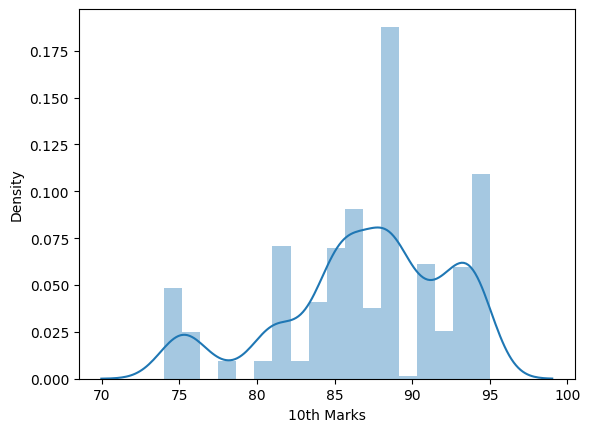

In [ ]:
sns.distplot(df['10th Marks'])

In [ ]:
y=y-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=22)
clfxg = XGBClassifier(objective="multi:softmax", n_estimators=50, learning_rate=0.0001)
clfxg.fit(X_train, y_train)
predxg = clfxg.predict(X_test)
scrxg = clfxg.score(X_test, y_test)
scrxg = "{:.2f}%".format(scrxg * 100)
print("Algorithm Score:", scrxg)


Algorithm Score: 80.39%


In [ ]:
pd.crosstab(y_test, predxg, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,6,9,11,12,13,...,25,26,28,31,32,33,35,36,37,All
True,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,3
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,3
11,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=36)
clfdt = DecisionTreeClassifier()
clfdt.fit(X_train,y_train)
preddt=clfdt.predict(X_test)
scrdt=clfdt.score(X_test,y_test)
scrdt=eval("%0.2f"%scrdt)*100
print("Algorithm Score: ",scrdt,"%")

Algorithm Score:  98.0 %


In [ ]:
df.head(2)

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,9
1,2015,95,92,2,100,11


In [ ]:
col=df.columns.tolist()[1:-1]
print(col)

['10th Marks', '12th Marks', '12th Division', 'AIEEE Rank']


In [ ]:
usrip=[]
for i in col:
    print("==================================================")
    usrip.append(eval(input(i+": ")))

10th Marks: 450
12th Marks: 890
12th Division: 3
AIEEE Rank: 543


In [ ]:
userpreddt=clfdt.predict([usrip])
print("You may have chance to get entrance in: ",colg[code.index(userpreddt[0])])

You may have chance to get entrance in:  IIEST shibpur


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
dct={col[i]:usrip[i]
    for i in range(len(col))}
print(dct)

{'10th Marks': 450, '12th Marks': 890, '12th Division': 3, 'AIEEE Rank': 543}


In [ ]:
uip=pd.DataFrame(dct,index=[len(X_test)])
uip.head()

,10th Marks,12th Marks,12th Division,AIEEE Rank
51,450,890,3,543


In [ ]:
userpredxg=clfxg.predict(uip)
print("You may have chance to get entrance in: ",colg[code.index(userpredxg[0])])

You may have chance to get entrance in:  IIT goa


In [ ]:
df1.head(2)

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,IIT Bombay
1,2015,95,92,2,100,IIT delhi


In [ ]:
df1['College Code']=bak_college
df1.head(2)

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,College Code
0,2019,90,89,3,98,IIT Bombay,9
1,2015,95,92,2,100,IIT delhi,11
